In [4]:
## scrupt to compare Duveiller dataset directly to cesm and mpiesm data using the concept of sensitivities
from func_utils import *
#make flags to change functionality of script
case_flag='crop-frst' ##currently only able to handle crop-ctl or frst-ctl
flag_maps=0
min_lcc=0.0
flag_sens=False
plot_lims=[-2,8]
seas='JJA'
smth=2
plt.rcParams['figure.figsize'] = [10, 8]

#read in model data 
outdir='/scratch/leuven/projects/lt1_2020_es_pilot/project_output/bclimate/sdeherto/cesm/work/postprocessing/signals_seperated/'+case_flag+'/'

fn_cesm_LH='Lmon/EFLX_LH_TOT/EFLX_LH_TOT_'+case_flag+'_cesm_'+seas+'ensmean_signal-separated.nc'
var_cesm_LH='EFLX_LH_TOT'
ds_cesm_LH=xr.open_dataset(outdir+fn_cesm_LH)
da_cesm_local_LH=ds_cesm_LH[var_cesm_LH+'_local']
da_cesm_nonlocal_LH=ds_cesm_LH[var_cesm_LH+'_nonlocal']
da_cesm_total_LH=ds_cesm_LH[var_cesm_LH+'_total']

fn_cesm_SH='Lmon/FSH_TO_COUPLER/FSH_TO_COUPLER_'+case_flag+'_cesm_'+seas+'ensmean_signal-separated.nc'
var_cesm_SH='FSH_TO_COUPLER'
ds_cesm_SH=xr.open_dataset(outdir+fn_cesm_SH)
da_cesm_local_SH=ds_cesm_SH[var_cesm_SH+'_local']
da_cesm_nonlocal_SH=ds_cesm_SH[var_cesm_SH+'_nonlocal']
da_cesm_total_SH=ds_cesm_SH[var_cesm_SH+'_total']

fn_cesm_albedo='Lmon/albedo/albedo_'+case_flag+'_cesm_'+seas+'ensmean_signal-separated.nc'
var_cesm_albedo='albedo'
ds_cesm_albedo=xr.open_dataset(outdir+fn_cesm_albedo)
da_cesm_local_albedo=ds_cesm_albedo[var_cesm_albedo+'_local']
da_cesm_nonlocal_albedo=ds_cesm_albedo[var_cesm_albedo+'_nonlocal']
da_cesm_total_albedo=ds_cesm_albedo[var_cesm_albedo+'_total']

fn_cesm_T2M='Amon/TREFHT/TREFHT_'+case_flag+'_cesm_'+seas+'ensmean_signal-separated.nc'
var_cesm_T2M='TREFHT'
ds_cesm_T2M=xr.open_dataset(outdir+fn_cesm_T2M)
da_cesm_local_T2M=ds_cesm_T2M[var_cesm_T2M+'_local']
da_cesm_nonlocal_T2M=ds_cesm_T2M[var_cesm_T2M+'_nonlocal']
da_cesm_total_T2M=ds_cesm_T2M[var_cesm_T2M+'_total']

fn_mpiesm_LH='Amon/hfls/hfls_'+case_flag+'_mpiesm_'+seas+'ensmean_signal-separated.nc'
ds_mpiesm_LH=xr.open_dataset(outdir+fn_mpiesm_LH)
da_mpiesm_local_LH=ds_mpiesm_LH['hfls_local']
da_mpiesm_nonlocal_LH=ds_mpiesm_LH['hfls_nonlocal']
da_mpiesm_total_LH=ds_mpiesm_LH['hfls_total']

fn_mpiesm_SH='Amon/hfss/hfss_'+case_flag+'_mpiesm_'+seas+'ensmean_signal-separated.nc'
ds_mpiesm_SH=xr.open_dataset(outdir+fn_mpiesm_SH)
da_mpiesm_local_SH=ds_mpiesm_SH['hfss_local']
da_mpiesm_nonlocal_SH=ds_mpiesm_SH['hfss_nonlocal']
da_mpiesm_total_SH=ds_mpiesm_SH['hfss_total']

fn_mpiesm_albedo='Lmon/albedo/albedo_'+case_flag+'_mpiesm_'+seas+'ensmean_signal-separated.nc'
ds_mpiesm_albedo=xr.open_dataset(outdir+fn_mpiesm_albedo)
da_mpiesm_local_albedo=ds_mpiesm_albedo['albedo_local']
da_mpiesm_nonlocal_albedo=ds_mpiesm_albedo['albedo_nonlocal']
da_mpiesm_total_albedo=ds_mpiesm_albedo['albedo_total']

fn_mpiesm_T2M='Amon/tas/tas_'+case_flag+'_mpiesm_'+seas+'ensmean_signal-separated.nc'
ds_mpiesm_T2M=xr.open_dataset(outdir+fn_mpiesm_T2M)
da_mpiesm_local_T2M=ds_mpiesm_T2M['tas_local']
da_mpiesm_nonlocal_T2M=ds_mpiesm_T2M['tas_nonlocal']
da_mpiesm_total_T2M=ds_mpiesm_T2M['tas_total']
    
# read in observational data
outdir_obs = '/scratch/leuven/projects/lt1_2020_es_pilot/project_output/bclimate/sdeherto/lamaclima_wp1/evaluation/processed_obs/'
fn_obs='DV_eflux.nc'
ds_obs=xr.open_dataset(outdir_obs+fn_obs)

fn_obs_li_albedo='li_albedo.nc'
fn_obs_li_ET='li_ET.nc'
ds_obs_li_albedo=xr.open_dataset(outdir_obs+fn_obs_li_albedo)
ds_obs_li_ET=xr.open_dataset(outdir_obs+fn_obs_li_ET)
fn_obs_alkama_T2M= 'Tseascycle_alkama.nc'
ds_obs_alkama_T2M=xr.open_dataset(outdir_obs+fn_obs_alkama_T2M)
if seas=='DJF':
    da_obs_li_albedo=ds_obs_li_albedo['albedo_li'][[11,0,1],:].mean('month')
    da_obs_li_ET=ds_obs_li_ET['ET_li'][[11,0,1],:].mean('month')
    da_obs_li_LE=da_obs_li_ET*0.945216049
    da_SH=ds_obs['Delta_HG_ext'][[11,0,1],:,:].mean('time')
    da_LE=ds_obs['Delta_LE_ext'][[11,0,1],:,:].mean('time')
    da_albedo=ds_obs['Delta_albedo_ext'][[11,0,1],:,:].mean('time')
    da_obs_alkama_T2M=ds_obs_alkama_T2M['Tmax'][[11,0,1],:,:].mean('time')
elif seas=='SON':
    da_obs_li_albedo=ds_obs_li_albedo['albedo_li'][[8,9,10],:].mean('month')
    da_obs_li_ET=ds_obs_li_ET['ET_li'][[8,9,10],:].mean('month')
    da_obs_li_LE=da_obs_li_ET*0.945216049
    da_SH=ds_obs['Delta_HG_ext'][[8,9,10],:,:].mean('time')
    da_LE=ds_obs['Delta_LE_ext'][[8,9,10],:,:].mean('time')
    da_albedo=ds_obs['Delta_albedo_ext'][[8,9,10],:,:].mean('time')
    da_obs_alkama_T2M=ds_obs_alkama_T2M['Tmax'][[8,9,10],:,:].mean('time')
elif seas=='MAM':
    da_obs_li_albedo=ds_obs_li_albedo['albedo_li'][[2,3,4],:].mean('month')
    da_obs_li_ET=ds_obs_li_ET['ET_li'][[2,3,4],:].mean('month')
    da_obs_li_LE=da_obs_li_ET*0.945216049
    da_SH=ds_obs['Delta_HG_ext'][[2,3,4],:,:].mean('time')
    da_LE=ds_obs['Delta_LE_ext'][[2,3,4],:,:].mean('time')
    da_albedo=ds_obs['Delta_albedo_ext'][[2,3,4],:,:].mean('time')
    da_obs_alkama_T2M=ds_obs_alkama_T2M['Tmax'][[2,3,4],:,:].mean('time')
elif seas=='JJA':
    da_obs_li_albedo=ds_obs_li_albedo['albedo_li'][[5,6,7],:].mean('month')
    da_obs_li_ET=ds_obs_li_ET['ET_li'][[5,6,7],:].mean('month')
    da_obs_li_LE=da_obs_li_ET*0.945216049
    da_SH=ds_obs['Delta_HG_ext'][[5,6,7],:,:].mean('time')
    da_LE=ds_obs['Delta_LE_ext'][[5,6,7],:,:].mean('time')
    da_albedo=ds_obs['Delta_albedo_ext'][[5,6,7],:,:].mean('time')
    da_obs_alkama_T2M=ds_obs_alkama_T2M['Tmax'][[5,6,7],:,:].mean('time')


#convert model data to sensitivities
ds_lu=xr.open_dataset(outdir_obs+case_flag+'_defor_cesm.nc')
da_lcc=ds_lu['defor']
da_lcc_cesm=xr.where(da_lcc<min_lcc,np.nan,da_lcc)
ds_lu=xr.open_dataset(outdir_obs+case_flag+'_defor_mpiesm.nc')
da_lcc=ds_lu['defor']
da_lcc=xr.where(da_lcc<min_lcc,np.nan,da_lcc)
da_lcc_mpiesm=da_lcc.sortby(["lat"], ascending=True)

if flag_sens==False:
    da_sens_local_cesm_LH=da_cesm_local_LH.mean('time')[:]
    da_sens_local_mpiesm_LH=da_mpiesm_local_LH.mean('time')[:]
    da_sens_nonlocal_cesm_LH=da_cesm_nonlocal_LH.mean('time')[:]
    da_sens_nonlocal_mpiesm_LH=da_mpiesm_nonlocal_LH.mean('time')[:]
    da_sens_total_cesm_LH=da_cesm_total_LH.mean('time')[:]
    da_sens_total_mpiesm_LH=da_mpiesm_total_LH.mean('time')[:]

    da_sens_local_cesm_SH=da_cesm_local_SH.mean('time')[:]
    da_sens_local_mpiesm_SH=da_mpiesm_local_SH.mean('time')[:]
    da_sens_nonlocal_cesm_SH=da_cesm_nonlocal_SH.mean('time')[:]
    da_sens_nonlocal_mpiesm_SH=da_mpiesm_nonlocal_SH.mean('time')[:]
    da_sens_total_cesm_SH=da_cesm_total_SH.mean('time')[:]
    da_sens_total_mpiesm_SH=da_mpiesm_total_SH.mean('time')[:]

    da_sens_local_cesm_albedo=da_cesm_local_albedo.mean('time')[:]
    da_sens_local_mpiesm_albedo=da_mpiesm_local_albedo.mean('time')[:]
    da_sens_nonlocal_cesm_albedo=da_cesm_nonlocal_albedo.mean('time')[:]
    da_sens_nonlocal_mpiesm_albedo=da_mpiesm_nonlocal_albedo.mean('time')[:]
    da_sens_total_cesm_albedo=da_cesm_total_albedo.mean('time')[:]
    da_sens_total_mpiesm_albedo=da_mpiesm_total_albedo.mean('time')[:]

    da_sens_local_cesm_T2M=da_cesm_local_T2M.mean('time')[:]
    da_sens_local_mpiesm_T2M=da_mpiesm_local_T2M.mean('time')[:]
    da_sens_nonlocal_cesm_T2M=da_cesm_nonlocal_T2M.mean('time')[:]
    da_sens_nonlocal_mpiesm_T2M=da_mpiesm_nonlocal_T2M.mean('time')[:]
    da_sens_total_cesm_T2M=da_cesm_total_T2M.mean('time')[:]
    da_sens_total_mpiesm_T2M=da_mpiesm_total_T2M.mean('time')[:]
else:
    da_sens_local_cesm_LH=da_cesm_local_LH.mean('time')[:]/da_lcc_cesm.values
    da_sens_local_mpiesm_LH=da_mpiesm_local_LH.mean('time')[:]/da_lcc_mpiesm.values
    da_sens_nonlocal_cesm_LH=da_cesm_nonlocal_LH.mean('time')[:]/da_lcc_cesm.values
    da_sens_nonlocal_mpiesm_LH=da_mpiesm_nonlocal_LH.mean('time')[:]/da_lcc_mpiesm.values
    da_sens_total_cesm_LH=da_cesm_total_LH.mean('time')[:]/da_lcc_cesm.values
    da_sens_total_mpiesm_LH=da_mpiesm_total_LH.mean('time')[:]/da_lcc_mpiesm.values

    da_sens_local_cesm_SH=da_cesm_local_SH.mean('time')[:]/da_lcc_cesm.values
    da_sens_local_mpiesm_SH=da_mpiesm_local_SH.mean('time')[:]/da_lcc_mpiesm.values
    da_sens_nonlocal_cesm_SH=da_cesm_nonlocal_SH.mean('time')[:]/da_lcc_cesm.values
    da_sens_nonlocal_mpiesm_SH=da_mpiesm_nonlocal_SH.mean('time')[:]/da_lcc_mpiesm.values
    da_sens_total_cesm_SH=da_cesm_total_SH.mean('time')[:]/da_lcc_cesm.values
    da_sens_total_mpiesm_SH=da_mpiesm_total_SH.mean('time')[:]/da_lcc_mpiesm.values

    da_sens_local_cesm_albedo=da_cesm_local_albedo.mean('time')[:]/da_lcc_cesm.values
    da_sens_local_mpiesm_albedo=da_mpiesm_local_albedo.mean('time')[:]/da_lcc_mpiesm.values
    da_sens_nonlocal_cesm_albedo=da_cesm_nonlocal_albedo.mean('time')[:]/da_lcc_cesm.values
    da_sens_nonlocal_mpiesm_albedo=da_mpiesm_nonlocal_albedo.mean('time')[:]/da_lcc_mpiesm.values
    da_sens_total_cesm_albedo=da_cesm_total_albedo.mean('time')[:]/da_lcc_cesm.values
    da_sens_total_mpiesm_albedo=da_mpiesm_total_albedo.mean('time')[:]/da_lcc_mpiesm.values

    da_sens_local_cesm_T2M=da_cesm_local_T2M.mean('time')[:]/da_lcc_cesm.values
    da_sens_local_mpiesm_T2M=da_mpiesm_local_T2M.mean('time')[:]/da_lcc_mpiesm.values
    da_sens_nonlocal_cesm_T2M=da_cesm_nonlocal_T2M.mean('time')[:]/da_lcc_cesm.values
    da_sens_nonlocal_mpiesm_T2M=da_mpiesm_nonlocal_T2M.mean('time')[:]/da_lcc_mpiesm.values
    da_sens_total_cesm_T2M=da_cesm_total_T2M.mean('time')[:]/da_lcc_cesm.values
    da_sens_total_mpiesm_T2M=da_mpiesm_total_T2M.mean('time')[:]/da_lcc_mpiesm.values


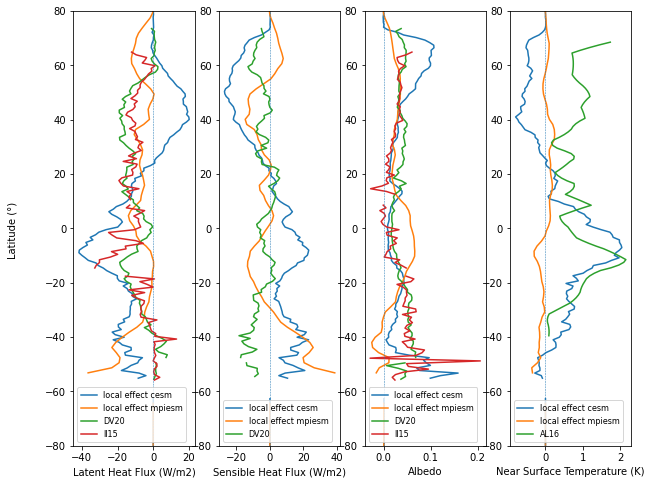

In [5]:
#plot the lat plot
plot_all=1
f, ax = plt.subplots(1,4)
da_LE=da_LE.sortby(["lat"], ascending=True)
da_SH=da_SH.sortby(["lat"], ascending=True)
da_albedo=da_albedo.sortby(["lat"], ascending=True)

i=0
j=0
#list_da_LH=[da_sens_local_cesm_LH,da_sens_nonlocal_cesm_LH,da_sens_total_cesm_LH,da_sens_local_mpiesm_LH,da_sens_nonlocal_mpiesm_LH,da_sens_total_mpiesm_LH]
#list_da_SH=[da_sens_local_cesm_SH,da_sens_nonlocal_cesm_SH,da_sens_total_cesm_SH,da_sens_local_mpiesm_SH,da_sens_nonlocal_mpiesm_SH,da_sens_total_mpiesm_SH]
#list_da_albedo=[da_sens_local_cesm_albedo,da_sens_nonlocal_cesm_albedo,da_sens_total_cesm_albedo,da_sens_local_mpiesm_albedo,da_sens_nonlocal_mpiesm_albedo,da_sens_total_mpiesm_albedo]
list_da_LH=[da_sens_local_cesm_LH,da_sens_local_mpiesm_LH]
list_da_SH=[da_sens_local_cesm_SH,da_sens_local_mpiesm_SH]
list_da_albedo=[da_sens_local_cesm_albedo,da_sens_local_mpiesm_albedo]
list_da_T2M=[da_sens_local_cesm_T2M,da_sens_local_mpiesm_T2M]

#label_list=['Local effect cesm','nonlocal effect cesm','total effect cesm','local effect mpiesm','nonlocal effect mpiesm','total effect mpiesm']
label_list=['local effect cesm','local effect mpiesm']
list_da=[list_da_LH,list_da_SH,list_da_albedo,list_da_T2M]
if plot_all==1:
    for dalist in list_da:
        j=j+1
        for da in dalist:
            i=i+1
            da=da.sortby(["lat"], ascending=True)
            name=da.name
            if i>len(dalist)/2:
                da=mask_data(da,case_flag,'mpiesm','lnd')
                dalat=da.mean(dim='lon')
                ax[j-1].plot(dalat.rolling(lat=int(smth),center=True).mean(),dalat.lat,label=label_list[i-1]) 
            else:
                da=mask_data(da,case_flag,'cesm','lnd')
                dalat=da.mean(dim='lon')
                ax[j-1].plot(dalat.rolling(lat=int(smth/2),center=True).mean(),dalat.lat,label=label_list[i-1]) 
        i=0
        if j==1: ##LE (li and DV)
            dalatLE=da_LE.mean(dim='lon')
            ax[j-1].plot(dalatLE.rolling(lat=int(smth/2),center=True).mean(),dalatLE.lat,label='DV20')     
            dalatLE_li=da_obs_li_LE*-1
            ax[j-1].plot(dalatLE_li.rolling(lat=int(smth/2),center=True).mean(),dalatLE_li.lat,label='lI15')  
            ax[j-1].set_xlabel('Latent Heat Flux (W/m2)')

        elif j==2: ###SH only DV
            dalatSH=da_SH.mean(dim='lon')
            ax[j-1].plot(dalatSH.rolling(lat=int(smth/2),center=True).mean(),dalatSH.lat,label='DV20')     
            ax[j-1].set_xlabel('Sensible Heat Flux (W/m2)')

        elif j==3:  ###albedo (li and DV)
            dalatalbedo=da_albedo.mean(dim='lon')
            ax[j-1].plot(dalatalbedo.rolling(lat=int(smth/2),center=True).mean(),dalatalbedo.lat,label='DV20')     
            dalatalbedo_li=da_obs_li_albedo*-1
            ax[j-1].plot(dalatalbedo_li.rolling(lat=int(smth/2),center=True).mean(),dalatalbedo_li.lat,label='lI15')  
            ax[j-1].set_xlabel('Albedo')

        elif j==4:  ###2m air temperature (Alkama)
            dalatT2M=da_obs_alkama_T2M.interp({'lat':da_albedo.lat.values})
            dalatT2M=dalatT2M.mean(dim='lon')
            ax[j-1].plot(dalatT2M.rolling(lat=int(smth*2),center=True).mean(),dalatT2M.lat,label='AL16')   
            ax[j-1].set_xlabel('Near Surface Temperature (K)')

            
        #ax[j-1].set_xlim([plot_lims[0],plot_lims[1]])
        ax[j-1].axvline(x=0,linewidth=0.5,linestyle='dashed')
        ax[j-1].legend(loc='lower left',prop={'size': 8})
        ax[j-1].set_ylim([-80,80])
    # Reserve space for axis labels
    #ax[0].set_ylabel('.', color=(0, 0, 0, 0))
    f.text(0.04, 0.5, 'Latitude (°)', va='center', ha='center', rotation='vertical')
    plt.show()
    f.savefig(outdir +'/'+ case_flag+ '_evaluation_sensitivity_efluxes'+seas+'_'+str(min_lcc)+'.png', dpi=300)
else:
    for dalist in list_da:
        f, ax = plt.subplots(1,1)
        j=j+1
        lw=0.8
        for da in dalist:
            i=i+1
            da=da.sortby(["lat"], ascending=True)
            name=da.name
            if i>len(dalist)/2:
                da=mask_data(da,case_flag,'mpiesm','lnd')
                dalat=da.mean(dim='lon')
                ax.plot(dalat.rolling(lat=int(smth),center=True).mean(),dalat.lat,label=label_list[i-1],linewidth=lw) 
            else:
                da=mask_data(da,case_flag,'cesm','lnd')
                dalat=da.mean(dim='lon')
                ax.plot(dalat.rolling(lat=int(smth/2),center=True).mean(),dalat.lat,label=label_list[i-1],linewidth=lw) 
        i=0
        if j==1: ##LE (li and DV)
            dalatLE=da_LE.mean(dim='lon')
            ax.plot(dalatLE.rolling(lat=int(smth/2),center=True).mean(),dalatLE.lat,label='DV20',linewidth=lw)     
            dalatLE_li=da_obs_li_LE*-1
            ax.plot(dalatLE_li.rolling(lat=int(smth/2),center=True).mean(),dalatLE_li.lat,label='li15',linewidth=lw)  

        elif j==2: ###SH only DV
            dalatSH=da_SH.mean(dim='lon')
            ax.plot(dalatSH.rolling(lat=int(smth/2),center=True).mean(),dalatSH.lat,label='DV20',linewidth=lw)     

        elif j==3:  ###albedo (li and DV)
            dalatalbedo=da_albedo.mean(dim='lon')
            ax.plot(dalatalbedo.rolling(lat=int(smth/2),center=True).mean(),dalatalbedo.lat,label='DV20',linewidth=lw)     
            dalatalbedo_li=da_obs_li_albedo*-1
            ax.plot(dalatalbedo_li.rolling(lat=int(smth/2),center=True).mean(),dalatalbedo_li.lat,label='li15',linewidth=lw)
        elif j==4:  ###2m air temperature (AL)
            dalatT2M=da_obs_alkama_T2M.interp({'lat':da_albedo.lat.values})
            dalatT2M=dalatT2M.mean(dim='lon')
            ax.plot(dalatT2M.rolling(lat=int(smth*2),center=True).mean(),dalatT2M.lat,label='AL16')    

        #ax[j-1].set_xlim([plot_lims[0],plot_lims[1]])
        ax.axvline(x=0,linewidth=0.5,linestyle='dashed')
        ax.legend(loc='lower left',prop={'size': 6})
        # Reserve space for axis labels
        ax[0].set_xlabel('.', color=(0, 0, 0, 0))
        ax[0].set_ylabel('.', color=(0, 0, 0, 0))
        # Make common axis labels
        f.text(0.5, 0.04, 'Surface Temperature (K)', va='center', ha='center')
        f.text(0.04, 0.5, 'Latitude (°)', va='center', ha='center', rotation='vertical')


    f.savefig(outdir +'/'+ case_flag+ '_evaluation_sensitivity_efluxes'+str(min_lcc)+'.png', dpi=300)